# $\Sigma^+$ reconstruction with IP constraint and mass constraint with refitted/dispalced $\pi^0$

## Cuts
- PID cut on proton and keep only protons with impact parameter larger than 0.01 cm.
- Keep only $\Sigma^+$ in mass range 1.18 ~ 1.20 GeV.
- IP constriant on $\Sigma^+$ vertex.
- Require the daughters of $\pi^0$ to have energy greater than 50 MeV, momentum greater than 100 MeV and the mass of $\pi^0$ within range 120 ~ 150 MeV.
- **No mass constraint on $\pi^0$**

## Code snapshot
```
ma.fillParticleList('p+:good', 'pid_ppi > 0.6 and pid_pk > 0.6 and abs(d0) >= 0.01', path = mp)
# Put a wide 20 MeV mass cut around the nominal mass
sigma_mass_cut = 'M >= 1.18 and M <= 1.20'
ma.reconstructDecay('Sigma+:all -> p+:good pi0:mdst', 
                    'M >= 1.18 and M <= 1.20', path = mp)
ma.vertexTree('Sigma+:all', 0, ipConstraint = True, massConstraint = [],
              updateAllDaughters = True, path = mp)

# Discard the low momentum pi0s as in the Belle note  
ma.cutAndCopyList('pi0:displaced', 'pi0:mdst', 'daughter(0, E) >= 0.04 and daughter(1, E) >= 0.04 and p >= 0.1 and M >= 0.12 and M <= 0.15', path = mp)

# Refit Sigma+ with displaced pi0
ma.reconstructDecay('Sigma+:updated -> p+:good pi0:displaced', '', path = mp)
ma.vertexTree('Sigma+:updated', 0, ipConstraint = True, massConstraint = [], path = mp)
# ma.matchMCTruth('Sigma+:all', path = mp)
ma.matchMCTruth('Sigma+:updated')
```

In [98]:
from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdg
import seaborn as sns
import glob

In [99]:
plt.rc('figure', figsize = (8, 6))
plt.rc('font', size = 13)
plt.rc('hist', bins = 200)

In [100]:
root_files = glob.glob('../data/sigma_ipconstraint_massconstraint_refitted/*.root')
print("%d root files found" % len(root_files))
%time sigma = read_root(root_files, 'sigma')

40 root files found
CPU times: user 3.58 s, sys: 107 ms, total: 3.68 s
Wall time: 4.85 s


In [101]:
sigma.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,ErrM,px,py,...,gamma2_p,gamma2_E,gamma2_cosTheta,gamma2_phi,gamma2_charge,gamma2_PDG,gamma2_E_uncertainty,gamma2_pxErr,gamma2_pyErr,gamma2_pzErr
0,55,24,15,0,1,1.0,1.188481,0.002822,-0.838042,-0.153864,...,0.119057,0.179989,0.852160,1.070278,0.0,111.0,0.001608,0.001318,0.004101,0.001159
1,55,24,25,0,1,1.0,1.182631,0.003455,0.069550,-0.257039,...,0.171491,0.218238,0.163686,0.126749,0.0,111.0,0.003214,0.004156,0.001342,0.000968
2,55,24,38,0,3,1.0,1.193883,0.001662,-0.681068,-0.455310,...,0.206912,0.247156,0.843049,-0.692418,0.0,111.0,0.004318,0.001327,0.001761,0.006427
3,55,24,38,1,3,1.0,1.199528,0.002478,0.269097,0.540675,...,0.284127,0.314573,0.912003,-0.707644,0.0,111.0,0.005493,0.001175,0.001632,0.006605
4,55,24,38,2,3,1.0,1.181382,0.001811,0.280475,0.561034,...,0.114934,0.177283,0.045579,-0.505586,0.0,111.0,0.001120,0.002275,0.001994,0.001072


In [102]:
len(sigma)

136638

In [103]:
unique_events = sigma[['__experiment__', '__run__', '__event__']].drop_duplicates()
unique_events.head()

,__experiment__,__run__,__event__
0,55,24,15
1,55,24,25
2,55,24,38
5,55,24,86
7,55,24,87


In [104]:
len(unique_events)

86029

In [105]:
sigma.iloc[unique_events.index].__ncandidates__.describe()

count    86029.000000
mean         1.475619
std          0.939343
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: __ncandidates__, dtype: float64

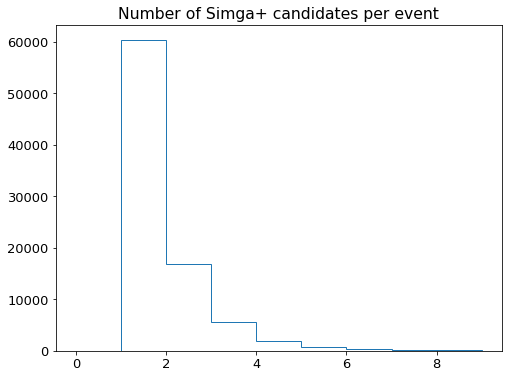

In [106]:
plt.hist(sigma.iloc[unique_events.index].__ncandidates__, bins = range(0, 10), histtype = 'step')
plt.title('Number of Simga+ candidates per event')
plt.show()

## $\Sigma^+$ and $\pi^0$ mass distribution

In [107]:
pdg.get('Sigma+')

<Particle "Sigma+" mass=1.18937 width=0 charge=1 pdg=3222>

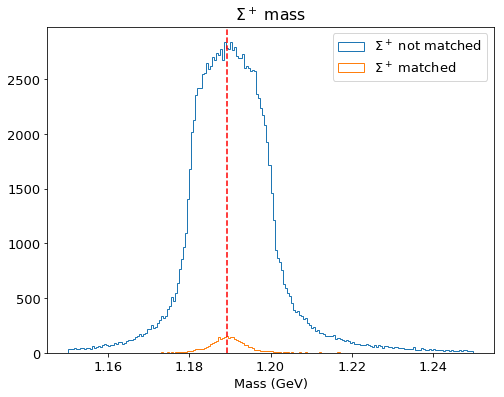

In [108]:
plt.hist(sigma[sigma.isSignal == 0].M, range = [1.15, 1.25], histtype = 'step', label = '$\Sigma^+$ not matched')
plt.hist(sigma[sigma.isSignal == 1].M, range = [1.15, 1.25], histtype = 'step', label = '$\Sigma^+$ matched')
plt.axvline(x = 1.18937, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\Sigma^+$ mass')
plt.show()

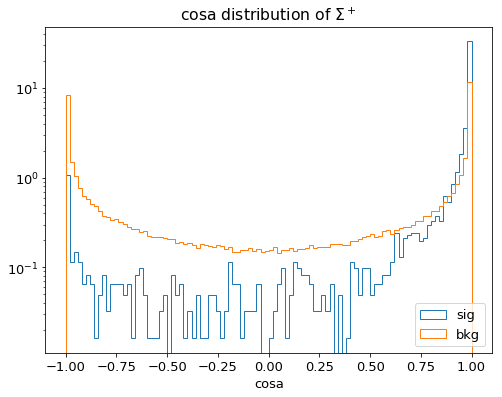

In [109]:
plt.hist(sigma[sigma.isSignal == 1].cosa, bins = 100, label = 'sig', histtype = 'step', density = True)
plt.hist(sigma[sigma.isSignal == 0].cosa, bins = 100, label = 'bkg', histtype = 'step', density = True)
plt.legend(loc = 'lower right')
plt.title('cosa distribution of $\Sigma^+$')
plt.xlabel('cosa')
plt.yscale('log')
plt.show()

In [110]:
pdg.get('pi0')

<Particle "pi0" mass=0.134977 width=0 charge=0 pdg=111>

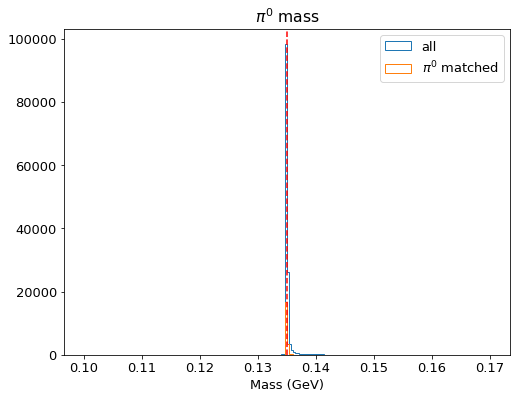

In [111]:
plt.hist(sigma.pi0_M, range = [.1, .17], histtype = 'step', label = 'all')
plt.hist(sigma[sigma.pi0_isSignal == 1].pi0_M, range = [.1, .17], histtype = 'step', label = '$\pi^0$ matched')
plt.axvline(x = 0.134977, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\pi^0$ mass')
plt.show()

In [112]:
sigma.pi0_isSignal.describe()

count    136638.000000
mean          0.154196
std           0.361138
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: pi0_isSignal, dtype: float64

## Vertex position of $\Sigma^+$

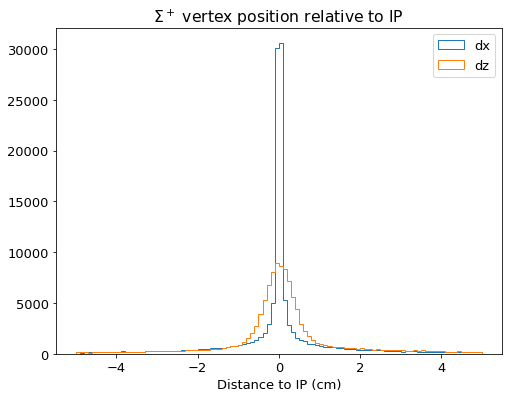

In [113]:
plt.hist(sigma.x - sigma.IPX, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.z - sigma.IPZ, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\Sigma^+$ vertex position relative to IP')
plt.xlabel('Distance to IP (cm)')
plt.legend()
plt.show()

## Vertex position of $\pi^0$

The vertex positions of $\pi^0$ and $\Sigma^+$ are the same as expected.

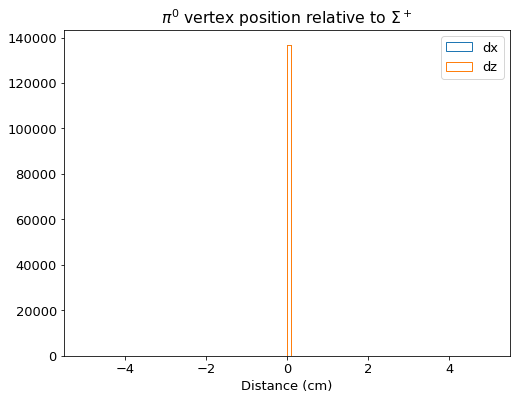

In [114]:
plt.hist(sigma.pi0_x - sigma.x, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.pi0_z - sigma.z, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\pi^0$ vertex position relative to $\Sigma^+$')
plt.xlabel('Distance (cm)')
plt.legend()
plt.show()

## What are the particles reconstructed as $\Sigma^+$?

In [115]:
def pdg_to_names(plist):
    import pdg
    name_list = []
    for part in plist:
        try:
            name_list += [pdg.to_name(part)]
        except:
            name_list += ['PDG = %d' % part]
    return name_list

def plot_particle_names(df, title = ''):
    df = df.value_counts().nlargest(20)
    df.index = pdg_to_names(df.index.astype('int'))
    df.plot('barh', log = True, figsize = (8, 8))
    plt.title(title)

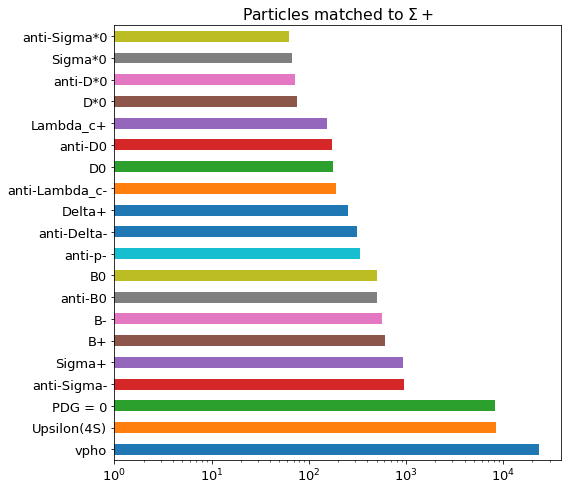

In [116]:
plot_particle_names(sigma[sigma.p>1].mcPDG, 'Particles matched to $\Sigma+$')

In [117]:
pdg.get('Upsilon(4S)')

<Particle "Upsilon(4S)" mass=10.5794 width=0.0205 charge=0 pdg=300553>